<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Define-the-problem" data-toc-modified-id="Define-the-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define the problem</a></span><ul class="toc-item"><li><span><a href="#What's-the-problem?" data-toc-modified-id="What's-the-problem?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>What's the problem?</a></span></li><li><span><a href="#Why-do-I-care-about-this-problem?" data-toc-modified-id="Why-do-I-care-about-this-problem?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Why do I care about this problem?</a></span></li><li><span><a href="#How-should-I-solve-this-problem?" data-toc-modified-id="How-should-I-solve-this-problem?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>How should I solve this problem?</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Basics-and-ETL" data-toc-modified-id="Basics-and-ETL-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Basics and ETL</a></span></li><li><span><a href="#Summarize-and-visualize-attributes" data-toc-modified-id="Summarize-and-visualize-attributes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Summarize and visualize attributes</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Algorithm-Evaluation" data-toc-modified-id="Algorithm-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithm Evaluation</a></span><ul class="toc-item"><li><span><a href="#Experiments" data-toc-modified-id="Experiments-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Experiments</a></span></li><li><span><a href="#Measure-Performance" data-toc-modified-id="Measure-Performance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Measure Performance</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Algorithm-Tuning" data-toc-modified-id="Algorithm-Tuning-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Algorithm Tuning</a></span></li><li><span><a href="#Ensemble-Methods" data-toc-modified-id="Ensemble-Methods-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Ensemble Methods</a></span></li></ul></li><li><span><a href="#Communicate" data-toc-modified-id="Communicate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Communicate</a></span><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Context</a></span></li><li><span><a href="#Methods-and-Findings" data-toc-modified-id="Methods-and-Findings-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Methods and Findings</a></span></li><li><span><a href="#Results-and-Caveats" data-toc-modified-id="Results-and-Caveats-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Results and Caveats</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Example</a></span></li></ul></div>

# Initialization

In [ ]:
##########
# basics #
##########

import warnings
warnings.filterwarnings('ignore')
import collections
import datetime as dt
import glob
import hashlib
import itertools
import math
import operator
import os
import pickle
import random
import re
import string
import sys
import time

###########
# science #
###########

import scipy as sp
import numpy as np
import pandas as pd
rseed = random.seed(42)
np.random.seed(rseed)

######
# ml #
######

import xgboost as xgb
import theano as thno
import keras as krs
import tensorflow as tf

###################
# sklearn tooling #
###################

from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn import grid_search
from sklearn import pipeline
from sklearn import feature_selection

#################
# visualization #
#################

# plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import cufflinks as cf
tls.set_credentials_file(
    username=os.environ.get('PLOTLY_USERNAME'),
    api_key=os.environ.get('PLOTLY_APIKEY'))
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
mpl.rcParams['figure.figsize'] = (15.0, 6.0)
%matplotlib inline

# seaborn
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('muted', n_colors=15, desat=None)
#sns.set_context("notebook", font_scale=1.5,
#                rc={"lines.linewidth": 2.5})

# graphistry
import graphistry
graphistry.register(key=os.environ.get('GRAPHISTRY_APIKEY'))

In [5]:
############
# sys info #
############

%reload_ext watermark
%watermark -a "Ken Cavagnolo" -n -u -v -m -h -g -p numpy,scipy,pandas,sklearn,theano,tensorflow,keras,xgboost,matplotlib,seaborn,plotly,graphistry

Ken Cavagnolo 
last updated: Sun Feb 11 2018 

CPython 3.6.2
IPython 6.2.1

numpy 1.14.0
scipy 0.19.1
pandas 0.22.0
sklearn 0.18.1
theano 0.9.0
tensorflow 1.3.0
keras 2.0.8
xgboost 0.6
matplotlib 2.0.2
seaborn 0.8.1
plotly 2.2.3
graphistry 0.9.51

compiler   : GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)
system     : Darwin
release    : 17.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
host name  : DrGonzo.local
Git hash   : 67cedef9b568e4b2c19cdd9159e8598b514fd5ca


# Define the problem

## What's the problem?
* Describe the problem informally, e.g. "I need a program that will tell me which tweets will get retweets."

* Describe the problem formally, e.g.
    * Task (T): Classify a tweet that has not been published as going to get retweets or not.
    * Experience (E): A corpus of tweets for an account where some have retweets and some do not.
    * Performance (P): Classification accuracy, the number of tweets predicted correctly out of all tweets considered as a percentage.

* List assumptions, e.g.
    * The specific words used in the tweet matter to the model.
    * The specific user that retweets does not matter to the model.
    * The number of retweets may matter to the model.
    * Older tweets are less predictive than more recent tweets.

* List similar problems, e.g. "A related problem would be email spam discrimination that uses text messages as input data and needs binary classification decision."

## Why do I care about this problem?
* What is my motivation for studying this problem?
* What are the benefits a solution provides?
* How does will a solution be used, e.g. value proposition?

## How should I solve this problem?
* Brainstorm! Literally type everything as a stream of consciousness (coffee helps here)

These are my thoughts. These are my thoughts. These are my thoughts. These are my thoughts. These are my thoughts. These are my thoughts. These are my thoughts. These are my thoughts. These are my thoughts. These are my thoughts.

* Describe how to solve problem manually
* What data do I have?
* What data do I need?
* What data I **don't** need?
* What do I know the least about in the solution process above?
    * knowledge gap 1
    * knowledge gap 2
* What am I concerned is incorrect in above solution? Find an expert online and ask them about these items
    * concern 1
    * concern 2

# Data Preparation

## Basics and ETL
* What data sources am I using?
* Format, Clean, Sample
* Diagnose missing values and anomalies (MVA's)
* What am I going to do w/ MVA's, e.g. simulate? averages? discard records?
* Replace missing values
* Remove duplicates
* One-Hot encode categorical features
* Find outliers and explain
* Scale
* Standardize

## Summarize and visualize attributes
* Data structure
* Distributions
* Histograms
* Pairwise scatterplots

## Feature Engineering
* Data has complex multi-dimensional structures that ML algos know how to find and exploit to make decisions
* You want to best expose those structures to the algo
* Some structures may be too dense or too complex for the algo to find without help
*Domain expertise comes into play here
* Attribute decomposition into simpler components
* Attribute aggregation, e.g. hyperattributes

# Algorithm Evaluation

## Experiments
* Test harness = test, train, and validation splits
* Loading up a bunch of standard machine learning algorithms into test harness
* Run 5-10 standard algorithms from each [major algo family](http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/) using transformed and scaled versions of the dataset
* Find types of algorithms and dataset combinations that give structure to the problem

## Measure Performance
* Select standard performance measures for the selected classes of algos
* Report mean and standard deviation of the accuracy
* Run statistical significance tests
* Which results are meaningful and not just noise?
* Create figures for each algo summarizing the distribution of accuracy
* Consider 10-fold cross-validation, if applicable

# Results

## Algorithm Tuning
* Which is the best model?
* What's my method forsearching model param space?
* Usually gonna be grid search
* Don't forget, the more tuning, the greaters chance of overfitting

## Ensemble Methods
* Should results of several models be combined?
* What's the justification?
* If so, how?
    * Bagging
    * Boosting
    * Blending

# Communicate

## Context
* Intro and history
* Statement of problem
* Goal of this project

## Methods and Findings
* Data sources
* Interesting things about data
* Outline of methods
* Implementation techniques
* Evaluation of implementation
* Analysis

## Results and Caveats
* What did I learn?
* What is interesting?
* What is useful?
* Where does the model not work?
* What questions does the model not answer?

## Conclusions
* Craft blog post from results
* Post code to Github
* Drop into social media stream

# Example

In [10]:
!locate iris.csv

/Library/Python/2.7/site-packages/pandas/io/tests/data/iris.csv
/Library/Python/2.7/site-packages/pandas/tests/data/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/blaze/examples/data/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/bokeh/sampledata/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/pandas/tests/data/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/pandas/tests/io/data/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/pandas/tests/io/parser/data/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/sklearn/datasets/data/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/statsmodels/genmod/tests/results/iris.csv
/Users/cavagnolo/anaconda/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/data/iris.csv
/Users/cavagnolo/anaconda/pkgs/blaze-0.10.1-py35_0/lib/python3.5/site-packages/blaze/examples/data/iris.csv
/Users/cavagnolo/anaconda/pkgs/bokeh-0.12.2-py35_0/l

In [11]:
import pandas as pd
data ='/usr/local/lib/python3.6/site-packages/pandas/tests/data/iris.csv'
iris_data = pd.read_csv(data, na_values=['NA'])
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


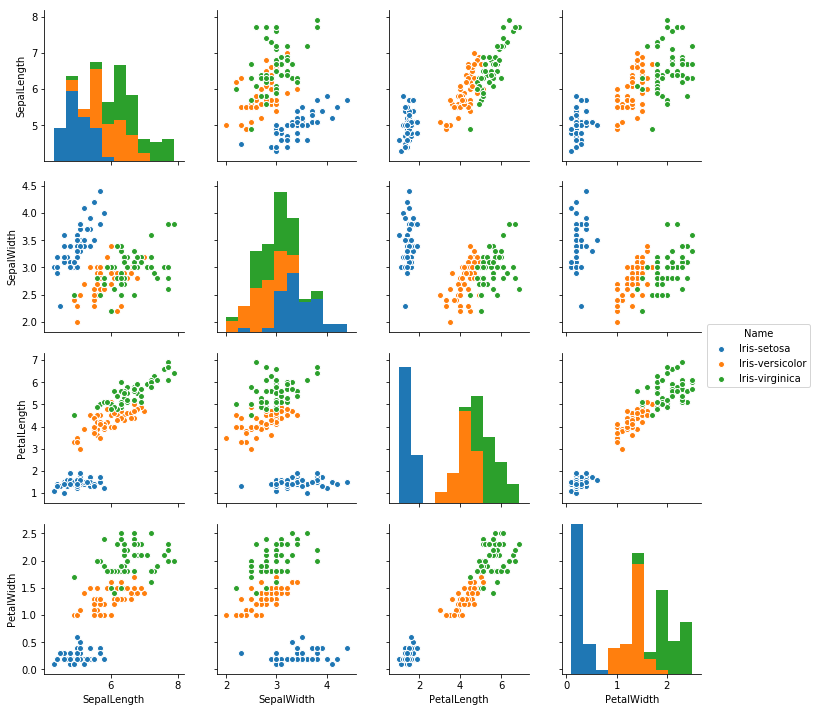

In [8]:
sns.pairplot(iris_data.dropna(), hue='Name')

In [9]:
iris_data.loc[(iris_data['SepalLength'] < 5.25)
              & (iris_data['PetalWidth'] > 0.75)]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
57,4.9,2.4,3.3,1.0,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
